In [4]:
#导入包
from numpy import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import scipy

In [5]:
#获取数据
def get_data(fileName):
    data = load_svmlight_file(fileName)
    return data[0],data[1]
X,Y = get_data("australian_scale.txt")

In [6]:
#切分数据
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)

(462, 14) (462,)


In [7]:
def sigmoid(X,weights):
    return 1/(1+np.exp(-X*weights))

In [8]:
def cul_accuracy(y,label):
    n = label.shape[1]
    count = 0.0
   
    for i in range(n):
        if(y[i,:] == label[:,i]):
            count +=1.0
    
    
    return (count/n)

In [9]:
#损失函数
delta =800
def loss(y,label,weights):
    m = y.shape[0]
    a = sum(np.power(weights,2))
    b = []
    
    for i in range(m):
        c = 1-label[:,i]*y[i,:]
        b.append(max(c,0))
    return  ( 1/(delta) * a +  sum(b)) / (2*m)

In [10]:
#梯度下降
def grad_des(X,label,X_test,Y_test,alpha=0.01,max_iter_count=1000):
    labelMat = label.T
    m,n = X.shape  
    #多插入一个BIAS
    x = scipy.sparse.csr.csr_matrix(ones((m,n+1)))
    #print(x.shape)
    x[:,1:n+1] = X
    #print(x[:,:n].shape)
    X = x
    #print(X.shape)
    x = scipy.sparse.csr.csr_matrix(ones((X_test.shape[0],n+1)))
    x[:,1:n+1] = X_test
    X_test = x
    
    
    #要多插入一个BIAS
    weights = mat(zeros(n+1))
    weights = weights.T
    print ("weights: ",weights.shape)
    iter_list=[]  
    loss_train_list=[]
    loss_test_list=[]
    train_accurcy = []
    test_accurcy = []
    
    grad = zeros(n+1)
    
    
    #阈值选为1.0
    theta = 1.0
    y = X*weights
    y[y>=theta] = 1.0
    y[y<-theta] = -1.0 
    label = mat(label)
    Y_test = mat(Y_test)
    print("lable",label.shape)
    print(label.shape, X.shape,weights.shape)
    grad = zeros(n+1)
    #要给出画出随迭代次数的变化图的数据
    for k in range(max_iter_count):
        #weights[1:] = delta * weights[1:]
        #grad = (y-label) *X  /m 
        #更新梯度
        #weights = weights - (alpha * grad)
        #print(label[0].shape)
        #c = 1-label*y.T
        
        #一般梯度下降
        '''
        c = label*(X*weights)
        #print(c)
        #print(k,(c.shape))
        
        if( c <=1): 
           #print(y.shape,X.shape)
            g = (label * X).T
            #print("grad,weights",grad.shape,weights.shape)
            grad =weights - delta*g
        else:
            grad =weights
        
        weights = weights - alpha * grad
        '''
        
        #SGD
        index = random.randint(0,m)
        Wx = X[index,:] * weights 
        #print( label[:,label])
        if(1 - Wx[0,0] * label[:,index] >= 0):
            grad = 1/delta * linalg.norm(weights) - X[index,:].T *  label[:,index]
        else:
            grad = 1/delta * linalg.norm(weights)
        
        weights = weights - alpha * grad
            
        
        #print(X.shape,weights.T.shape)
        y = X*(weights)
        y[y>=theta] = 1.0
        y[y<-theta]  = -1.0
        
        y_test = X_test*weights
        y_test[y_test>=theta] = 1.0
        y_test[y_test<-theta] = -1.0
        #y_test = X_test * weights
        #计算损失
        loss_train= loss(y,label,weights)
        loss_test = loss(y_test , Y_test,weights) 
        #添加进准确率集合
        train_accurcy.append(cul_accuracy(y,label))
        test_accurcy.append(cul_accuracy(y_test,Y_test))
        #添加进损失集合
        iter_list.append(k)
        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
    return weights,iter_list,loss_train_list,loss_test_list,train_accurcy,test_accurcy

In [11]:
weights,iter_list,loss_train_list,loss_test_list,train_accurcy,test_accurcy= grad_des(X_train,y_train, 
                                                           X_test,y_test,0.005,1000)

weights:  (15, 1)
lable (1, 462)
(1, 462) (462, 15) (15, 1)


In [12]:
loss_train_list[999] 

0.14047273684704786

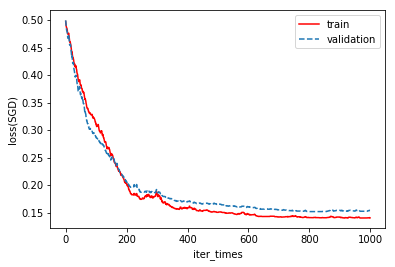

In [16]:
plt.figure()
plt.plot(iter_list,loss_train_list,color = 'red',linewidth = 1.5,label = "train")
plt.plot(iter_list,loss_test_list,linestyle = '--',label = "validation",linewidth = 1.5)
plt.xlabel('iter_times')  
plt.ylabel('loss(SGD)') 
plt.legend()

plt.show()

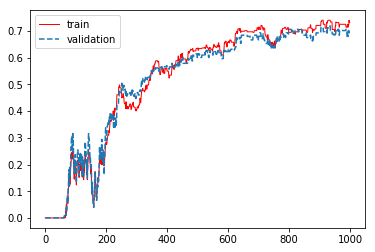

In [15]:
plt.figure()
plt.plot(iter_list,train_accurcy,color = 'red',linewidth = 1.0,label = "train")
plt.plot(iter_list,test_accurcy,linestyle = '--',label = "validation")
plt.legend()
plt.show()